In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data preparation

In [2]:
df = pd.read_excel('company_data.xlsx')
df.head()

,Name,ZIP,City,Unnamed: 3,Web,Revenue (in thousands),Employees,Area,Address,Region
0,SCA HYGIENE PRODUCTS SL,43812,Puigpelat,977030600.0,www.sca.com,618000.0,1200,Industria,Ctra. Vilabella (km 2),ALT CAMP
1,LEAR CORPORATION HOLDING SPAIN SLU,43800,Valls,977617100.0,www.lear.com,506088.0,1216,Industria,"C/ Fusters, 54, Pol. Ind.",ALT CAMP
2,COVESTRO SL.,43110,Tarragona,977358100.0,www.bayer.es,300592.0,344,Petroquímica y plásticos,"C/Entrevías (Pol. Ind. Químico Sur), s/n",TARRAGONES
3,ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,43891,Vandellós l'Hospitalet de l'Infant,977818800.0,www.anav.es,276654.0,1047,"Agua, Energía y Residuos",Ctra. Nacional 340 (km 1.123),BAIX CAMP
4,BASF SONATRACH PROPANCHEM SA,43006,Tarragona,977256703.0,www.basf.es,276019.0,11,Petroquímica y plásticos,Ctra. Nacional 340 (km 1.156),TARRAGONES


In [3]:
df = df.rename(columns={'Revenue (in thousands)': 'Revenue_in_thousands'})
company_df = df[['Name', 'Revenue_in_thousands', 'Employees', 'Area', 'Region']]
company_df.head()

,Name,Revenue_in_thousands,Employees,Area,Region
0,SCA HYGIENE PRODUCTS SL,618000.0,1200,Industria,ALT CAMP
1,LEAR CORPORATION HOLDING SPAIN SLU,506088.0,1216,Industria,ALT CAMP
2,COVESTRO SL.,300592.0,344,Petroquímica y plásticos,TARRAGONES
3,ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,276654.0,1047,"Agua, Energía y Residuos",BAIX CAMP
4,BASF SONATRACH PROPANCHEM SA,276019.0,11,Petroquímica y plásticos,TARRAGONES


In [4]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  809 non-null    object 
 1   Revenue_in_thousands  809 non-null    float64
 2   Employees             809 non-null    object 
 3   Area                  809 non-null    object 
 4   Region                801 non-null    object 
dtypes: float64(1), object(4)
memory usage: 31.7+ KB


In [5]:
company_df['Area'] = company_df['Area'].str.upper()  #ensuring that all the values are unambiguous

C:\Users\Kaja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Distribution of companies by revenue/emploees number

In [6]:
plt.style.use('seaborn')

Text(0.5, 0, 'Revenue in thousands')

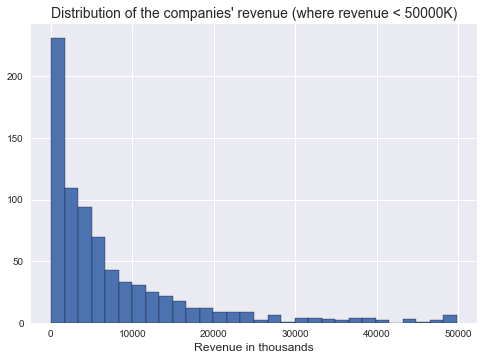

In [7]:
threshold = 50000
rev_filter = company_df['Revenue_in_thousands'] < threshold
company_df.loc[rev_filter,'Revenue_in_thousands'].hist(bins=30,edgecolor='black')
plt.title(f"Distribution of the companies' revenue (where revenue < {threshold}K)", size = 14)
plt.xlabel('Revenue in thousands', size = 12)

In [8]:
unique = company_df['Employees'].unique()
for el in unique:
    if not isinstance(el, int):
        print(el)

n.d.


In [9]:
empl_filter1 = company_df['Employees'] == 'n.d.' #dropping rows with "n.d." value as 'Employees'
empl_df = company_df[~empl_filter1]

Text(0.5, 0, 'Revenue in thousands')

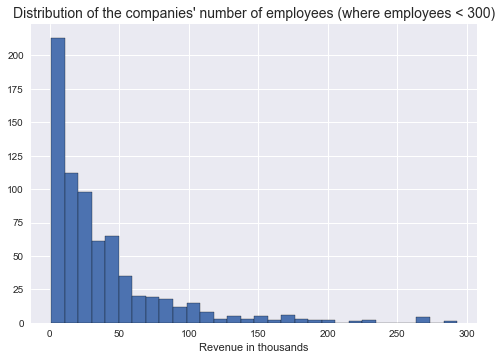

In [10]:
empl_filter2 = empl_df['Employees'] < 300
empl_df.loc[empl_filter2, 'Employees'].hist(bins=30,edgecolor='black')
plt.title(f"Distribution of the companies' number of employees (where employees < 300)", size = 14)
plt.xlabel('Revenue in thousands')

# Areas by empl, revenue, counts

In [11]:
#create df with revenues, employees and number of companies grouped by areas
areas_r = company_df.groupby('Area').Revenue_in_thousands.sum().sort_values(ascending=False)
areas_e = empl_df.groupby('Area').Employees.sum().sort_values(ascending=False)
bar_df = areas_r.to_frame()
bar_df['Employees'] = areas_e
bar_df['Number_of_companies'] = company_df['Area'].value_counts()

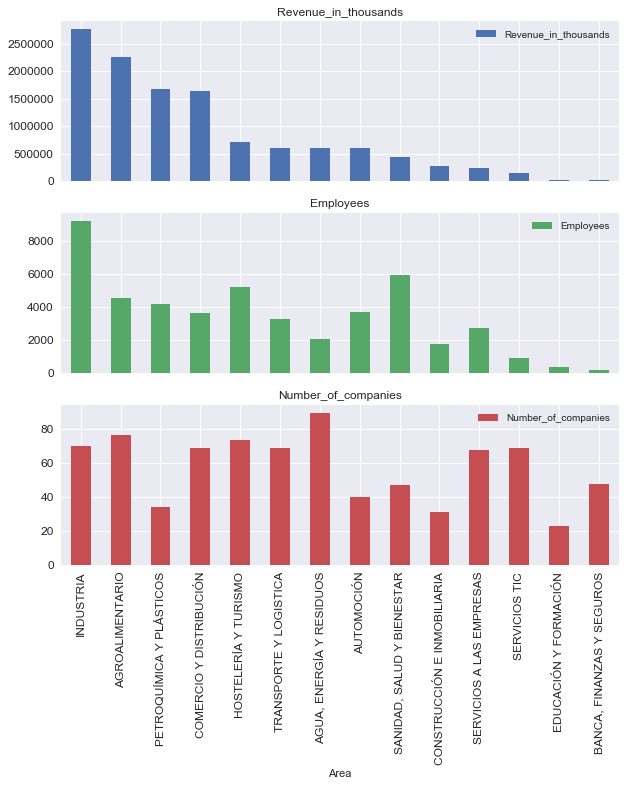

In [12]:
axes = bar_df.plot.bar(rot=90, subplots=True,figsize =(10,10), fontsize= 12)

# Division of revenue/employees by region

In [13]:
company_df['Region'].value_counts().count(), empl_df['Region'].value_counts().count()

(10, 10)

In [14]:
#preparing revenue data
region_r = company_df.groupby('Region').Revenue_in_thousands.sum().sort_values(ascending=False)
top_region_r = company_df.groupby('Region').Revenue_in_thousands.sum().sort_values(ascending=False).head(4)
other_region_r = company_df.groupby('Region').Revenue_in_thousands.sum().sort_values(ascending=False).tail(6)
top_region_r['OTHERS'] = other_region_r.sum()
top_region_r.sum() == region_r.sum() #checking if no values have been missed

True

In [15]:
#preparing employees data
region_e = empl_df.groupby('Region').Employees.sum().sort_values(ascending=False)
top_region_e = empl_df.groupby('Region').Employees.sum().sort_values(ascending=False).head(4)
other_region_e = empl_df.groupby('Region').Employees.sum().sort_values(ascending=False).tail(6)
top_region_e['OTHERS'] = other_region_e.sum()
top_region_e.sum() == region_e.sum() #checking if no values have been missed

True

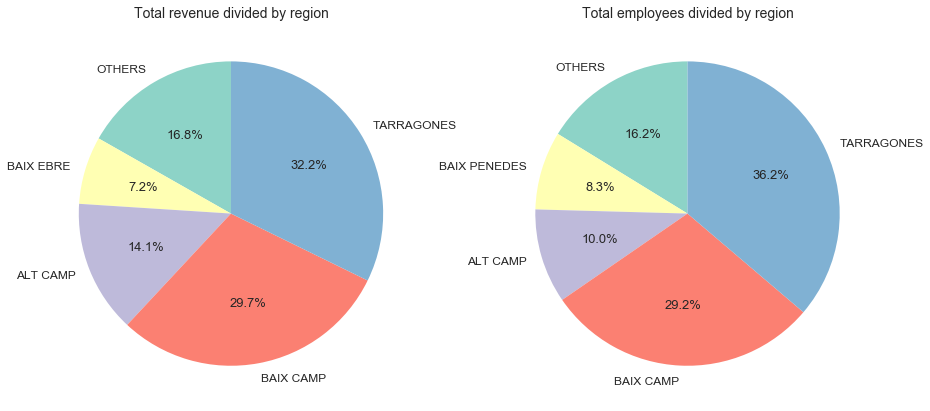

In [16]:
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
fig, [ax1, ax2] = plt.subplots(ncols=2,figsize=(15,15))

# first plot
patches, texts, autotexts = ax1.pie(top_region_r[::-1].values, labels=top_region_r[::-1].index, colors=colors, 
                                   startangle=90,autopct='%1.1f%%')
ax1.set_title('Total revenue divided by region',fontsize=14)
for i in range(5):
    texts[i].set_fontsize(12)
    autotexts[i].set_fontsize(13)

# second plot
patches, texts, autotexts = ax2.pie(top_region_e[::-1].values, labels=top_region_e[::-1].index, colors=colors, 
                                   startangle=90,autopct='%1.1f%%')
ax2.set_title('Total employees divided by region',fontsize=14)
for i in range(5):
    texts[i].set_fontsize(12)
    autotexts[i].set_fontsize(13)

# Most influential companies
Companies which are in each set of 10 top companies by revenue, benefits and employees.

In [17]:
df2 = pd.read_excel('company_data.xlsx', 'Benefits')
df2.head()

,Name,Benefits (in thousands)
0,BASF SONATRACH PROPANCHEM SA,50710.00000
1,PORT AVENTURA ENTERTAINMENT SAU,29931.00000
2,LEAR CORPORATION HOLDING SPAIN SLU,28332.00000
3,TECHNICAL MINDS INVESTMENT SL,21077.33177
4,APPLUS IDIADA,13897.00000


In [18]:
benefits_by_name = df2.set_index('Name')
companies_by_name = company_df.set_index('Name')
companies_by_name['Benefits_in_thousands'] = benefits_by_name['Benefits (in thousands)'] #create common df

In [19]:
top_r = companies_by_name.sort_values('Revenue_in_thousands', ascending=False).head(10)
top_b = companies_by_name.sort_values('Benefits_in_thousands', ascending=False).head(10)
empl_filter1 = companies_by_name['Employees'] == 'n.d.'
top_e = companies_by_name[~empl_filter1].sort_values('Employees', ascending=False).head(10)

In [20]:
top_companies = list(set(top_b.index).intersection(top_r.index, top_e.index))

In [21]:
companies_by_name.loc[top_companies]

,Revenue_in_thousands,Employees,Area,Region,Benefits_in_thousands
Name,,,,,
APPLUS IDIADA,180383.0,2152,AUTOMOCIÓN,BAIX PENEDES,13897.0
PORT AVENTURA ENTERTAINMENT SAU,194150.0,1727,HOSTELERÍA Y TURISMO,TARRAGONES,29931.0
LEAR CORPORATION HOLDING SPAIN SLU,506088.0,1216,INDUSTRIA,ALT CAMP,28332.0
